In [20]:
%load_ext autoreload
%autoreload 2
from sgtaxidata import *
from sklearn.ensemble import *
from sklearn.neighbors import *
import numpy as np

DBNAME='../taxis.db'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
dates=taxis.get_dates(DBNAME)
dates

['20170624',
 '20170625',
 '20170626',
 '20170627',
 '20170628',
 '20170629',
 '20170630',
 '20170701',
 '20170702',
 '20170703',
 '20170704',
 '20170705',
 '20170706',
 '20170707',
 '20170708']

In [22]:
lat,lon=utils.get_lat_long("Senkang")
print lat,lon

1.3868121 103.8914433


In [29]:
data=[analysis.get_weekday_data(date,DBNAME,lat,lon,holidays=['20170626']) for date in dates]
data=[x for x in data if x is not None]

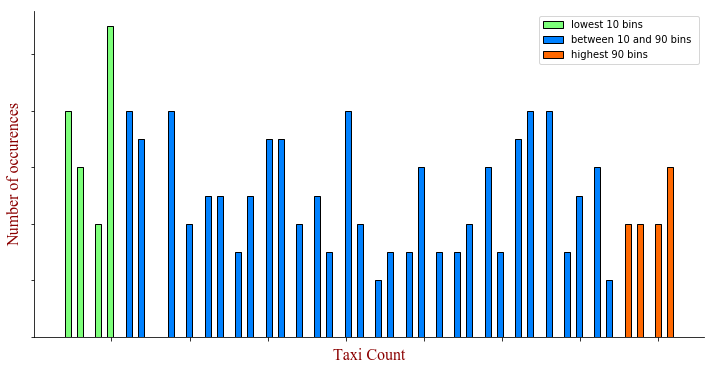

In [35]:
d=data[4]
visualize.plot_hist(d['TaxiCount'])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


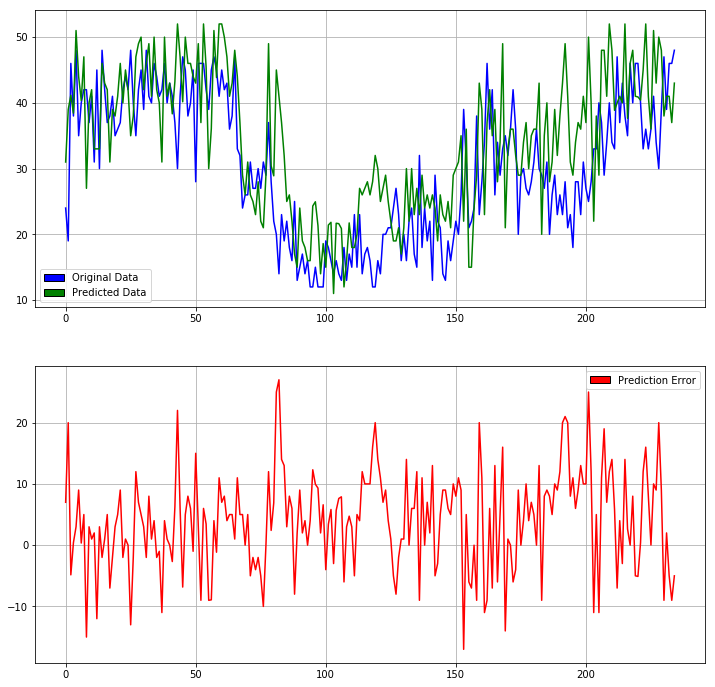

In [32]:
kn=KNeighborsRegressor(weights='distance')
for df in data[:-1]:
    X=df.drop(['TaxiCount'],axis=1).as_matrix()
    y=np.array(df['TaxiCount'].tolist()).reshape(-1,1)
    kn.fit(X,y)
    print kn.score(X,y)
    
test=data[-1]

Xt=test.drop(['TaxiCount'],axis=1).as_matrix()
yt=np.array(test['TaxiCount'].tolist()).reshape(-1,1)

visualize.plot_model(Xt,yt,kn)

/Users/hari/python/py2/taxidata/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.854047179315
0.572409445835
0.680698721664
0.696596899216
0.720726387952
0.488382483412
0.600664027124
0.457219130644
0.656826548534


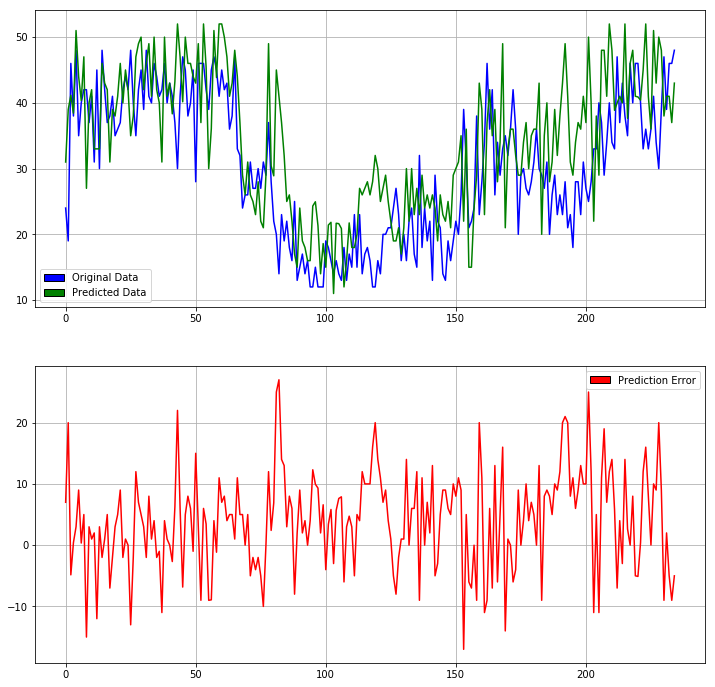

In [33]:
rf=RandomForestRegressor(n_estimators=10,n_jobs=10,warm_start=True)
for df in data[:-1]:
    X=df.drop(['TaxiCount'],axis=1).as_matrix()
    y=np.array(df['TaxiCount'].tolist()).reshape(-1,1)
    rf.fit(X,y)
    rf.n_estimators+=10
    print rf.score(X,y)
    
test=data[-1]

Xt=test.drop(['TaxiCount'],axis=1).as_matrix()
yt=np.array(test['TaxiCount'].tolist()).reshape(-1,1)

visualize.plot_model(Xt,yt,kn)